In [80]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [56]:
true_params = [3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]

In [57]:
# true_params = [1.8, 0.01, 0.29, -0.6, 0.1]

In [58]:
S0 = 149.54
# S0 = 100
T = 30
r = 0.0245
# r = 0.15
q = 0
N = 10000

In [66]:
y = sim.simulate_heston_state(true_params, S0, r, N=N) 

### simulate path and ekf generated path

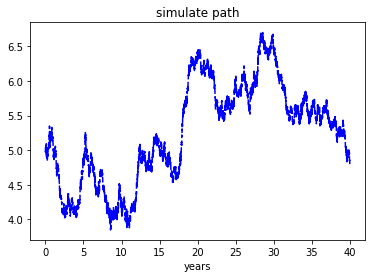

In [67]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]


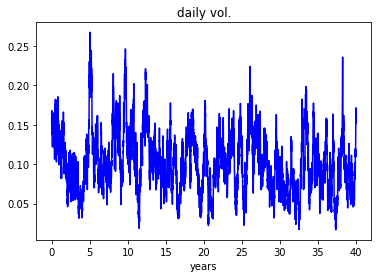

In [68]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [131]:
init_params = [5, 0.3, -0.05, -0.1, 0.4]

### Initial path vs. true path

In [132]:
y_ = sim.simulate_heston_state(init_params, S0, r, N=N) 

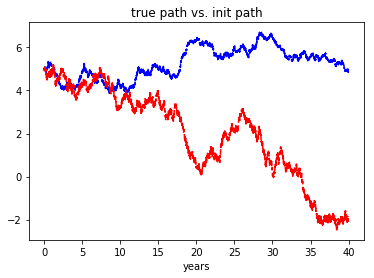

In [133]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]


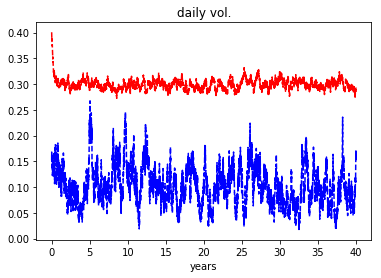

In [134]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

### Note: Optimization takes time...

In [135]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    r = args[2]
    return kf.ekf_heston_obj(y, params, S0, r)

In [136]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [161]:
args = (y[0,:].T, S0, r)
maxiter = 1000

In [162]:
print("Init params: {}".format(init_params))

Init params: [5, 0.3, -0.05, -0.1, 0.4]


In [169]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 323
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 324
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 325
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 326
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 327
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 328
x_i: [ 0.69256789  0.03923912 -0.04532115 -0.35462876  0.13210981]
f_i: -6554.589503586404
i: 329
x_i: [ 0.68091837  0.03932409 -0.04808527 -0.35834042  0.13365367]
f_i: -6554.750302775888
i: 330
x_i: [ 0.68091837  0.03932409 -0.04808527 -0.35834042  0.13365367]
f_i: -6554.750302775888
i: 331
x_i: [ 0.67023823  0.03840108 -0.04930102 -0.36740042  0.13096764]
f_i: -6554.9390855602605
i: 332
x_i: [ 0.67023823  0.03840108 -0.04930102 -0.36740042  0.13096764]
f_i: -6554.9390855602605
i: 333
x_i: [ 0.67

i: 407
x_i: [ 0.16489061  0.02728793 -0.14505272 -0.89925547  0.09854133]
f_i: -6562.684748899117
i: 408
x_i: [ 0.16489061  0.02728793 -0.14505272 -0.89925547  0.09854133]
f_i: -6562.684748899117
i: 409
x_i: [ 0.16690822  0.02719046 -0.14359461 -0.89874817  0.09879205]
f_i: -6562.686560764269
i: 410
x_i: [ 0.16863811  0.02731251 -0.14210714 -0.90227099  0.09887795]
f_i: -6562.688524827625
i: 411
x_i: [ 0.16863811  0.02731251 -0.14210714 -0.90227099  0.09887795]
f_i: -6562.688524827625
i: 412
x_i: [ 0.16697869  0.02751972 -0.14220016 -0.90821652  0.09893908]
f_i: -6562.6932405001635
i: 413
x_i: [ 0.16697869  0.02751972 -0.14220016 -0.90821652  0.09893908]
f_i: -6562.6932405001635
i: 414
x_i: [ 0.16697869  0.02751972 -0.14220016 -0.90821652  0.09893908]
f_i: -6562.6932405001635
i: 415
x_i: [ 0.16868689  0.02776298 -0.13826421 -0.92106232  0.0988127 ]
f_i: -6562.699800916885
i: 416
x_i: [ 0.16868689  0.02776298 -0.13826421 -0.92106232  0.0988127 ]
f_i: -6562.699800916885
i: 417
x_i: [ 0.1

i: 491
x_i: [ 0.16026723  0.03391761 -0.11821567 -1.08678645  0.09785407]
f_i: -6562.759146802786
i: 492
x_i: [ 0.16026723  0.03391761 -0.11821567 -1.08678645  0.09785407]
f_i: -6562.759146802786
i: 493
x_i: [ 0.16086091  0.03376263 -0.11859594 -1.08206814  0.09788928]
f_i: -6562.759180348777
i: 494
x_i: [ 0.16058218  0.03381917 -0.11845673 -1.08364034  0.09782341]
f_i: -6562.759203354418
i: 495
x_i: [ 0.16058218  0.03381917 -0.11845673 -1.08364034  0.09782341]
f_i: -6562.759203354418
i: 496
x_i: [ 0.16106577  0.03369491 -0.11864037 -1.08074236  0.09789328]
f_i: -6562.759204217856
i: 497
x_i: [ 0.16077989  0.03398357 -0.11803856 -1.0871932   0.09785705]
f_i: -6562.759210775082
i: 498
x_i: [ 0.1605713   0.03386951 -0.11830521 -1.08516042  0.09786409]
f_i: -6562.759218879765
i: 499
x_i: [ 0.160774    0.03392292 -0.11807726 -1.08623757  0.09784887]
f_i: -6562.759251818652
i: 500
x_i: [ 0.160774    0.03392292 -0.11807726 -1.08623757  0.09784887]
f_i: -6562.759251818652
i: 501
x_i: [ 0.1608

i: 575
x_i: [ 0.14914939  0.03117193 -0.10387956 -1.23812989  0.09755576]
f_i: -6562.774449558006
i: 576
x_i: [ 0.14914939  0.03117193 -0.10387956 -1.23812989  0.09755576]
f_i: -6562.774449558006
i: 577
x_i: [ 0.14914939  0.03117193 -0.10387956 -1.23812989  0.09755576]
f_i: -6562.774449558006
i: 578
x_i: [ 0.14991526  0.03166887 -0.10196041 -1.25603388  0.09742617]
f_i: -6562.776142213197
i: 579
x_i: [ 0.14991526  0.03166887 -0.10196041 -1.25603388  0.09742617]
f_i: -6562.776142213197
i: 580
x_i: [ 0.14991526  0.03166887 -0.10196041 -1.25603388  0.09742617]
f_i: -6562.776142213197
i: 581
x_i: [ 0.14991526  0.03166887 -0.10196041 -1.25603388  0.09742617]
f_i: -6562.776142213197
i: 582
x_i: [ 0.14962818  0.03147186 -0.10265787 -1.25079339  0.09759405]
f_i: -6562.776185200456
i: 583
x_i: [ 0.14962818  0.03147186 -0.10265787 -1.25079339  0.09759405]
f_i: -6562.776185200456
i: 584
x_i: [ 0.14971378  0.03200653 -0.09923998 -1.28615486  0.09741267]
f_i: -6562.777202071673
i: 585
x_i: [ 0.1497

i: 659
x_i: [ 0.14843046  0.0306227  -0.08814025 -1.43232682  0.09788402]
f_i: -6562.788257819766
i: 660
x_i: [ 0.14830523  0.03039065 -0.08761048 -1.44062515  0.0979428 ]
f_i: -6562.788455197192
i: 661
x_i: [ 0.14830523  0.03039065 -0.08761048 -1.44062515  0.0979428 ]
f_i: -6562.788455197192
i: 662
x_i: [ 0.14830523  0.03039065 -0.08761048 -1.44062515  0.0979428 ]
f_i: -6562.788455197192
i: 663
x_i: [ 0.14875154  0.03071131 -0.08751749 -1.44050957  0.09785487]
f_i: -6562.7887462023655
i: 664
x_i: [ 0.14875154  0.03071131 -0.08751749 -1.44050957  0.09785487]
f_i: -6562.7887462023655
i: 665
x_i: [ 0.14875154  0.03071131 -0.08751749 -1.44050957  0.09785487]
f_i: -6562.7887462023655
i: 666
x_i: [ 0.14903097  0.03058016 -0.08590935 -1.46309463  0.09800113]
f_i: -6562.7888608205185
i: 667
x_i: [ 0.14910507  0.0306973  -0.08562337 -1.46669767  0.097912  ]
f_i: -6562.789358640515
i: 668
x_i: [ 0.14910507  0.0306973  -0.08562337 -1.46669767  0.097912  ]
f_i: -6562.789358640515
i: 669
x_i: [ 0.

i: 743
x_i: [ 0.14858102  0.02958453 -0.07789809 -1.59731411  0.09811982]
f_i: -6562.792460653255
i: 744
x_i: [ 0.14858102  0.02958453 -0.07789809 -1.59731411  0.09811982]
f_i: -6562.792460653255
i: 745
x_i: [ 0.14825009  0.02931386 -0.07629278 -1.62520867  0.09804909]
f_i: -6562.792661743375
i: 746
x_i: [ 0.1489047   0.02985722 -0.07556139 -1.63927719  0.09802402]
f_i: -6562.793002881922
i: 747
x_i: [ 0.1489047   0.02985722 -0.07556139 -1.63927719  0.09802402]
f_i: -6562.793002881922
i: 748
x_i: [ 0.14850663  0.02987534 -0.07540725 -1.64615269  0.09806139]
f_i: -6562.793892376964
i: 749
x_i: [ 0.14850663  0.02987534 -0.07540725 -1.64615269  0.09806139]
f_i: -6562.793892376964
i: 750
x_i: [ 0.14850663  0.02987534 -0.07540725 -1.64615269  0.09806139]
f_i: -6562.793892376964
i: 751
x_i: [ 0.14850663  0.02987534 -0.07540725 -1.64615269  0.09806139]
f_i: -6562.793892376964
i: 752
x_i: [ 0.14850663  0.02987534 -0.07540725 -1.64615269  0.09806139]
f_i: -6562.793892376964
i: 753
x_i: [ 0.1485

i: 827
x_i: [ 0.13814599  0.02950711 -0.06777176 -1.87046005  0.09734841]
f_i: -6562.8033342237195
i: 828
x_i: [ 0.13824899  0.02947778 -0.06785438 -1.86768623  0.09734584]
f_i: -6562.803339036017
i: 829
x_i: [ 0.13797656  0.02945629 -0.06771472 -1.87227345  0.09731923]
f_i: -6562.803340551987
i: 830
x_i: [ 0.13797656  0.02945629 -0.06771472 -1.87227345  0.09731923]
f_i: -6562.803340551987
i: 831
x_i: [ 0.13801373  0.02950639 -0.0677128  -1.8724756   0.09731426]
f_i: -6562.803341645414
i: 832
x_i: [ 0.13801373  0.02950639 -0.0677128  -1.8724756   0.09731426]
f_i: -6562.803341645414
i: 833
x_i: [ 0.13808976  0.02951073 -0.06774351 -1.87143101  0.09733416]
f_i: -6562.803342304858
i: 834
x_i: [ 0.13797343  0.02952441 -0.06768788 -1.87353372  0.09731561]
f_i: -6562.803343165311
i: 835
x_i: [ 0.13813575  0.02949776 -0.06777855 -1.87022455  0.09733271]
f_i: -6562.803344305628
i: 836
x_i: [ 0.13813575  0.02949776 -0.06777855 -1.87022455  0.09733271]
f_i: -6562.803344305628
i: 837
x_i: [ 0.138

i: 911
x_i: [ 0.1364883   0.02889061 -0.064926   -1.95191806  0.09718993]
f_i: -6562.804513333509
i: 912
x_i: [ 0.1364883   0.02889061 -0.064926   -1.95191806  0.09718993]
f_i: -6562.804513333509
i: 913
x_i: [ 0.13656773  0.02833786 -0.06442406 -1.96307454  0.09724534]
f_i: -6562.804588744212
i: 914
x_i: [ 0.13656773  0.02833786 -0.06442406 -1.96307454  0.09724534]
f_i: -6562.804588744212
i: 915
x_i: [ 0.1374208   0.02862808 -0.06425697 -1.96376057  0.09726399]
f_i: -6562.804838601886
i: 916
x_i: [ 0.1374208   0.02862808 -0.06425697 -1.96376057  0.09726399]
f_i: -6562.804838601886
i: 917
x_i: [ 0.13736665  0.02832654 -0.06410359 -1.9678588   0.0973288 ]
f_i: -6562.805006838467
i: 918
x_i: [ 0.13736665  0.02832654 -0.06410359 -1.9678588   0.0973288 ]
f_i: -6562.805006838467
i: 919
x_i: [ 0.13736665  0.02832654 -0.06410359 -1.9678588   0.0973288 ]
f_i: -6562.805006838467
i: 920
x_i: [ 0.13736665  0.02832654 -0.06410359 -1.9678588   0.0973288 ]
f_i: -6562.805006838467
i: 921
x_i: [ 0.1373

i: 995
x_i: [ 0.13759026  0.02885246 -0.05847679 -2.1478414   0.09739942]
f_i: -6562.8084091196
i: 996
x_i: [ 0.13759026  0.02885246 -0.05847679 -2.1478414   0.09739942]
f_i: -6562.8084091196
i: 997
x_i: [ 0.13748925  0.02907245 -0.05888537 -2.13657939  0.09739745]
f_i: -6562.808432244673
i: 998
x_i: [ 0.13748925  0.02907245 -0.05888537 -2.13657939  0.09739745]
f_i: -6562.808432244673
i: 999
x_i: [ 0.1374052   0.02883725 -0.05830385 -2.15509737  0.09739499]
f_i: -6562.808541242907
i: 1000
x_i: [ 0.1374052   0.02883725 -0.05830385 -2.15509737  0.09739499]
f_i: -6562.808541242907
i: 1001
x_i: [ 0.1374052   0.02883725 -0.05830385 -2.15509737  0.09739499]
f_i: -6562.808541242907
i: 1002
x_i: [ 0.1374052   0.02883725 -0.05830385 -2.15509737  0.09739499]
f_i: -6562.808541242907
i: 1003
x_i: [ 0.13768072  0.02901186 -0.05872153 -2.14089066  0.09739832]
f_i: -6562.808552973764
i: 1004
x_i: [ 0.13768072  0.02901186 -0.05872153 -2.14089066  0.09739832]
f_i: -6562.808552973764
i: 1005
x_i: [ 0.13

i: 1078
x_i: [ 0.13546048  0.02865922 -0.05490583 -2.29537928  0.09729471]
f_i: -6562.810526616139
i: 1079
x_i: [ 0.13546048  0.02865922 -0.05490583 -2.29537928  0.09729471]
f_i: -6562.810526616139
i: 1080
x_i: [ 0.13528465  0.028669   -0.05458389 -2.30886505  0.09726115]
f_i: -6562.81055131539
i: 1081
x_i: [ 0.13528465  0.028669   -0.05458389 -2.30886505  0.09726115]
f_i: -6562.81055131539
i: 1082
x_i: [ 0.13528465  0.028669   -0.05458389 -2.30886505  0.09726115]
f_i: -6562.81055131539
i: 1083
x_i: [ 0.13549186  0.02868002 -0.05486461 -2.29703294  0.0972881 ]
f_i: -6562.810558454204
i: 1084
x_i: [ 0.13549186  0.02868002 -0.05486461 -2.29703294  0.0972881 ]
f_i: -6562.810558454204
i: 1085
x_i: [ 0.13513798  0.02857158 -0.05470434 -2.30495947  0.09728511]
f_i: -6562.810566481462
i: 1086
x_i: [ 0.13532044  0.02863896 -0.05435294 -2.31747422  0.09726339]
f_i: -6562.810596363449
i: 1087
x_i: [ 0.13532044  0.02863896 -0.05435294 -2.31747422  0.09726339]
f_i: -6562.810596363449
i: 1088
x_i: 

i: 1161
x_i: [ 0.13498626  0.02849218 -0.0482746  -2.60385989  0.09744465]
f_i: -6562.813536462834
i: 1162
x_i: [ 0.13463866  0.02828314 -0.04807724 -2.61358357  0.09739973]
f_i: -6562.813677443873
i: 1163
x_i: [ 0.13463866  0.02828314 -0.04807724 -2.61358357  0.09739973]
f_i: -6562.813677443873
i: 1164
x_i: [ 0.13488752  0.02809715 -0.04763249 -2.63722871  0.09748011]
f_i: -6562.813712981859


KeyboardInterrupt: 

In [170]:
print("Optimal params: {}".format(xopt))
print("True Params: {}".format(true_params))

Optimal params: [ 0.69256789  0.03923912 -0.04532115 -0.33774167  0.13210981]
True Params: [3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]


In [171]:
y_ = sim.simulate_heston_state(xopt, S0, r, N=N) 

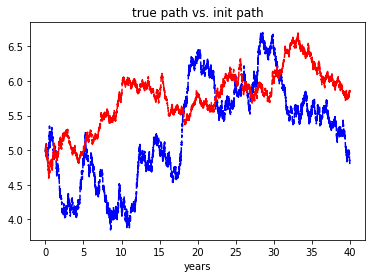

In [172]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[0]]


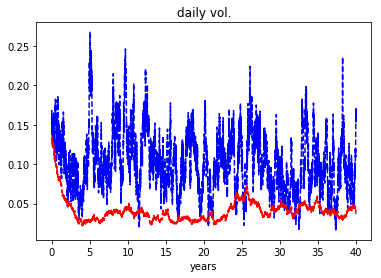

In [173]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()